### Linear Regression model for Predicting Housing Prices

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14960,-116.92,32.76,9.0,1859.0,307.0,947.0,304.0,5.9202,181300.0,<1H OCEAN
10264,-117.85,33.90,20.0,4026.0,648.0,1997.0,650.0,5.5918,260500.0,<1H OCEAN
18676,-121.90,36.93,22.0,7281.0,1233.0,1849.0,832.0,5.3276,335500.0,NEAR OCEAN
18794,-122.76,40.40,22.0,2153.0,461.0,903.0,314.0,2.1250,123200.0,INLAND
10230,-117.93,33.86,17.0,1627.0,398.0,1216.0,369.0,3.3438,186600.0,<1H OCEAN
9362,-122.53,37.93,42.0,2171.0,362.0,887.0,347.0,6.6125,393200.0,NEAR BAY
15866,-122.41,37.76,52.0,1427.0,281.0,620.0,236.0,1.9944,262500.0,NEAR BAY
17343,-120.41,34.86,15.0,978.0,187.0,407.0,182.0,4.3750,158000.0,<1H OCEAN
4720,-118.37,34.05,35.0,2457.0,552.0,1159.0,523.0,3.0862,345300.0,<1H OCEAN
7515,-118.25,33.92,36.0,949.0,164.0,502.0,163.0,4.1042,124400.0,<1H OCEAN


### Exploratory Data Analysis


#### median_house_value Distribution


<Axes: xlabel='median_house_value', ylabel='Count'>

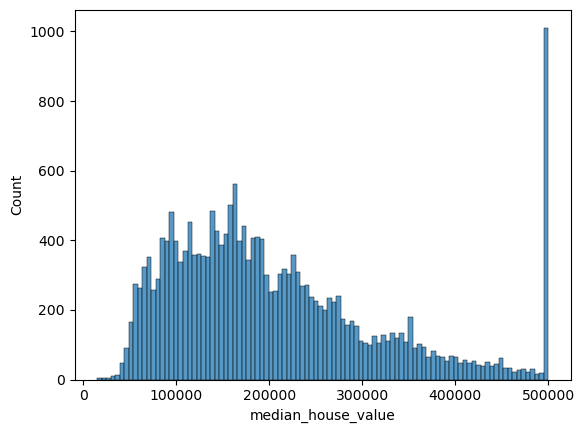

In [6]:
sns.histplot(df.median_house_value, bins=100)

### Dataset Preparation

In [7]:
df = df[(df['ocean_proximity'] =='<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]

In [8]:
df = df[['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
         'population', 'households', 'median_income', 'median_house_value']]

In [9]:
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


#### Question 1
There's one feature with missing values. What is it?

In [10]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Answer: total_bedrooms

#### Question 2
What's the median (50% percentile) for variable 'population'?

In [11]:
df['population'].describe()

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

Answer: 1195

### Setting Validation Framework

In [12]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)

n, n_val, n_test, n_train

(15687, 3137, 3137, 9413)

In [13]:
np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

In [14]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

In [15]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [16]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [19]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

In [20]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

#### Question 3:
We need to deal with missing values for the column from Q1. \
We have two options: fill it with 0 or with the mean of this variable. \
Try both options. For each, train a linear regression model without regularization using the code from the lessons. \
For computing the mean, use the training only! \
Use the validation dataset to evaluate the models and compare the RMSE of each option. \
Round the RMSE scores to 2 decimal digits using round(score, 2) \
Which option gives better RMSE? \
Options: 

With 0 \
With mean \
Both are equally good


### Baseline Solution

In [ ]:
base = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
         'population', 'households', 'median_income']

### Training a Linear Regression Model (Nan with 0)

In [22]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [23]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [24]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

In [25]:
y_pred = w0 + X_train.dot(w)

In [27]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    score = np.sqrt(mse)
    return round(score, 2)

In [28]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.34

### Training a Linear Regression Model (Nan with mean)

In [31]:
def prepare_X(df):
    m = df['total_bedrooms'].mean()
    df_num = df[base]
    df_num = df_num.fillna(m)
    X = df_num.values
    return X

In [32]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

In [33]:
y_pred = w0 + X_train.dot(w)

In [35]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.34

Answer: Both are equally good

### Question 4
Now let's train a regularized linear regression.\
For this question, fill the NAs with 0.\
Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].\
Use RMSE to evaluate the model on the validation dataset.\
Round the RMSE scores to 2 decimal digits.\
Which r gives the best RMSE?\
If there are multiple options, select the smallest r.\

Options:

0\
0.000001\
0.001\
0.0001

In [36]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [37]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.34

### Regularization

In [38]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [39]:
X_train = prepare_X(df_train)

In [45]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w0, w[5], w[7]))

    0, -9.76, -0.00, 0.18
1e-06, -9.76, -0.00, 0.18
0.0001, -9.76, -0.00, 0.18
0.001, -9.74, -0.00, 0.18
 0.01, -9.56, -0.00, 0.18
  0.1, -8.06, -0.00, 0.18
    1, -3.13, -0.00, 0.19
    5, -0.84, -0.00, 0.19
   10, -0.44, -0.00, 0.19


In [48]:
X_val = prepare_X(df_val)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0 -9.763249477929213 0.34
1e-06 -9.76322883158197 0.34
0.0001 -9.761185235939122 0.34
0.001 -9.74264624988528 0.34
0.01 -9.561056193156471 0.34
0.1 -8.058889769818062 0.34
1 -3.1331542785822872 0.34
5 -0.841086797533389 0.35
10 -0.4381172315908744 0.35


Answer: All the options\
0
0.000001
0.001
0.0001

### Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.\
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].\
For each seed, do the train/validation/test split with 60%/20%/20% distribution.\
Fill the missing values with 0 and train a model without regularization.\
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.\
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.\
Round the result to 3 decimal digits (round(std, 3))\
What's the value of std?\

0.5\
0.05\
0.005\
0.0005

In [51]:
rmse_list = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)
    
    X_val = prepare_X(df_val,)
    y_val = w0 + X_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_pred),2)
    
    rmse_list.append(rmse_val)
    
    print(s, w0, rmse_val)

0 -9.870068971209022 0.62
1 -9.114011209351693 0.62
2 -9.911560201548127 0.64
3 -10.233183681556076 0.63
4 -9.17476345052165 0.65
5 -10.00664830312435 0.63
6 -10.03990309976383 0.64
7 -10.35354544517724 0.64
8 -9.899416167430525 0.64
9 -9.964622126250438 0.64


In [52]:
rmse_list

[0.62, 0.62, 0.64, 0.63, 0.65, 0.63, 0.64, 0.64, 0.64, 0.64]

In [53]:
np.round(np.std(rmse_list),3)

0.009

Answer to question 5: 0.009

#### Question 6
Split the dataset like previously, use seed 9.\
Combine train and validation datasets.\
Fill the missing values with 0 and train a model with r=0.001.\
What's the RMSE on the test dataset?\
Options:

0.13\
0.23\
0.33\
0.43

In [56]:
s = 9

idx = np.arange(n)
np.random.seed(s)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
    
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()


full_train = pd.concat([df_train, df_val])

full_train = full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

full_y_train_orig = full_train.median_house_value.values
y_test_orig = df_test.median_house_value.values

full_y_train = np.log1p(full_train.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del full_train['median_house_value']
del df_test['median_house_value']

In [61]:
X_train = prepare_X(full_train)
w0, w = train_linear_regression_reg(X_train, full_y_train, r=0.001)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

np.round(rmse(y_test, y_pred),2)

0.33

Answer to Question 6: 0.33